In [1]:
# Processing for EKF for Semantic Tracking

from  PIL  import  Image
from lang_sam import LangSAM
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_images_from_folder(folder):
    # Get the directory path
    directory = os.path.join('data', folder)

    # Load images from the directory
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            images.append(os.path.join(directory, filename))
        else:
            continue

    # Organize images by name
    images.sort()

    # Open every image and add to the list
    image_list = []
    for image in images:
        image_list.append(Image.open(image).convert("RGB"))

    return image_list

def images_to_video(images, output_path, fps=30):
    """
    Converts a collection of PIL images to a video.

    Args:
        images (list): A list of PIL images to be converted to a video.
        output_path (str): The path of the output video file.
        fps (int, optional): Frames per second of the output video (default is 30).

    Returns:
        None
    """
    # Get the dimensions of the first image
    width, height = images[0].size

    # Define the video codec, output file, and frames per second (fps)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Convert PIL images to OpenCV format and write to the video
    for image in images:
        frame = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        video.write(frame)

    # Release the video writer
    video.release()


def bounding_boxes_to_pose(bounding_boxes, image_width, image_height):
    poses = []

    for box in bounding_boxes:
        # Convert box coordinates to pose
        x, y, w, h = box
        center_x = (x + w / 2) / image_width
        center_y = (y + h / 2) / image_height
        w_norm = w / image_width
        h_norm = h / image_height
        pose_measurement = [center_x, center_y, w_norm, h_norm]

        # Add pose to list of poses
        poses.append(np.array(pose_measurement))

    return poses


def pose_to_bounding_box(pose, image_width, image_height):
    # Convert pose to bounding box
    center_x, center_y, w_norm, h_norm = pose
    w = w_norm * image_width
    h = h_norm * image_height
    x = center_x * image_width - w / 2
    y = center_y * image_height - h / 2
    bounding_box = [x, y, w, h]

    return bounding_box



def get_frame_bounding_boxes(image_list, text_prompt):
    """
    Get the bounding boxes of every frame in a list of images along with the predicted masks.

    Args:
        image_list (list): List of PIL images.
        text_prompt (str): Text prompt for model prediction.

    Returns:
        List of tuples: Each tuple contains the masks and bounding boxes for a single image.
                       The masks are a list of predicted masks for each frame in the image.
                       The bounding boxes are a list of bounding boxes for each frame in the image.
    """
    model = LangSAM()

    results = []

    for image_pil in image_list:
        # Get masks, boxes, phrases, and logits using LangSAM model
        masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)


        masks = masks.numpy()
        poses = boxes.numpy()
        logits = logits.numpy()

        results.append((masks, poses, logits))


    return results




/Users/omoruyiatekha/opt/anaconda3/lib/python3.8/site-packages/groundingdino/models/GroundingDINO/ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")


In [16]:
# Import List
folder = 'skate_is'
image_list = load_images_from_folder(folder)

# Get Bounding Boxes
text_prompt = 'converse shoes'
results = get_frame_bounding_boxes(image_list, text_prompt)

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded from /Users/omoruyiatekha/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight'])


/Users/omoruyiatekha/opt/anaconda3/lib/python3.8/site-packages/transformers/modeling_utils.py:874: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/Users/omoruyiatekha/opt/anaconda3/lib/python3.8/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


In [3]:
poseIS = [0.41414769, 0.88724993, 0.28830418, 0.60231493]
# convert to bounding box
bounding_box = pose_to_bounding_box(poseIS, 4096, 2160)
print("bounding box is ", bounding_box)


bounding box is  [1105.9019776, 1265.9597244, 1180.89392128, 1301.0002488]


True

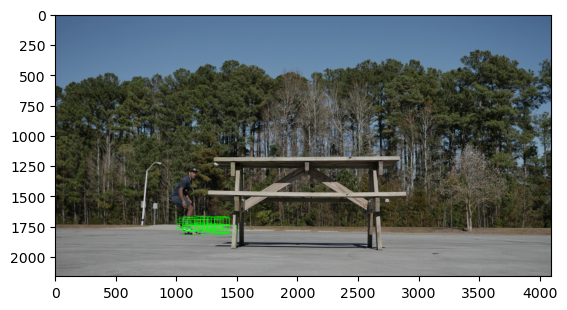

In [24]:
# Apply the mask to the image and plot them 
import matplotlib.pyplot as plt
masked_Images = []
image_array = np.asarray(image_list[0])
for i in range(len(image_list)):
    
    for box in results[i][1]:
        image_array = cv2.rectangle(image_array, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)

# plot the image with all the bounding boxes
plt.imshow(image_array)

# export the image
cv2.imwrite('bounding_box.jpg', image_array)




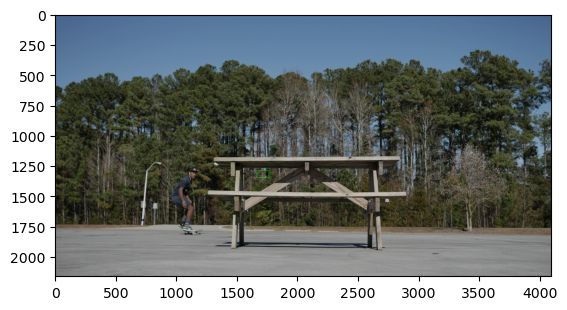

In [ ]:
imim = np.asarray(image_list[0])
tempBoxes = [1667.485,  1290.1733, 1766.5311, 1348.9749]
imim = cv2.rectangle(imim, (int(tempBoxes[0]), int(tempBoxes[1])), (int(tempBoxes[2]), int(tempBoxes[3])), (0, 255, 0), 2)
plt.imshow(imim)
plt.show()


In [210]:
print(results[0][2])

[0.4288069  0.48558506 0.43117025 0.33244497]


In [ ]:

# Here I will create an EKF function to track the bounding boxes, and then I will create a Multi-Hypothesis EKF to track objects using the probabilities of the masks

class EKF:

    """
    Args: x: state vector, P: covariance matrix, F: state transition matrix, Q: process noise covariance matrix, H: measurement matrix, R: measurement noise covariance matrix
    """

    def __init__(self, mu, sigma, F, Q, H, R, dt):
        self.mu = mu
        self.sigma = sigma
        self.F = F
        self.Q = Q
        self.H = H
        self.R = R
        self.dt = dt

    def predict(self):
        self.mu = self.F @ self.mu
        self.sigma = self.F @ self.sigma @ self.F.T + self.Q

    def update(self, z):
        

        innovation = z - self.H @ self.mu
        # print(self.sigma)
        innovation = z - self.H @ self.mu
        K = self.sigma @ self.H.T @ np.linalg.inv(self.H @ self.sigma @ self.H.T + np.random.multivariate_normal(np.zeros(4), self.R))
        self.mu = self.mu + K @ innovation
        self.sigma = self.sigma - K @ self.H @ self.sigma



def f(x, dt):
    # State transition function, for constant velocity model, for pose {x,y,w,h} and velocity {vx,vy,vw,vh}
    # mu = [x, y, w, h, vx, vy, vw, vh]

    F = np.array([[1, 0, 0, 0, dt, 0, 0, 0],
                    [0, 1, 0, 0, 0, dt, 0, 0],
                    [0, 0, 1, 0, 0, 0, dt, 0],
                    [0, 0, 0, 1, 0, 0, 0, dt],
                    [0, 0, 0, 0, 1, 0, 0, 0],
                    [0, 0, 0, 0, 0, 1 ,0, 0],
                    [0, 0, 0, 0, 0, 0, 1 ,0],
                    [0, 0, 0, 0, 0, 0, 0 ,1]])
    return F

def prune(trajectories, alphas, threshold):

    assert len(trajectories) == len(alphas), "The length of trajectories and alphas must be equal."

    pruned_trajectories = []
    pruned_alphas = []

    for traj, alpha in zip(trajectories, alphas):
        if alpha >= threshold:
            pruned_trajectories.append(traj)
            pruned_alphas.append(alpha)

    return pruned_trajectories, pruned_alphas

def h(x):
    # Measurement function, for pose {x,y,w,h}
    # mu = [x, y, w, h]
    # H is a 4 x 8 matrix that maps the state vector to the measurement vector
    H = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 1 ,0, 0, 0, 0, 0, 0],
                    [0, 0, 1 ,0, 0, 0, 0, 0],
                    [0, 0, 0, 1 ,0, 0, 0, 0]])
    
    return H 

def computeVelocity(x1, x2, dt):
    # Compute velocity between two poses
    # x1 = [x, y, w, h], x2 = [x, y, w, h]
    vx = (x2[0] - x1[0]) / dt
    vy = (x2[1] - x1[1]) / dt
    vw = (x2[2] - x1[2]) / dt
    vh = (x2[3] - x1[3]) / dt
    return np.array([vx, vy, vw, vh])


class Trajectory:
    def __init__(self, states, sigmas):
        self.states = states
        self.sigmas = sigmas

def MHEKF(results, dt):

    n = len(results)
    pose_measurements = []
    gamma = []
    initial_sigma = np.eye(8)  * 10
    trajectories = []
    alphas = []
    max_hypotheses = 100
    Q = np.eye(8) * 10 * dt
    R = np.eye(4) * 10


    # converting the bounding boxes from results into poses
    for result in results:
        pose_measurements.append(bounding_boxes_to_pose(result[1], 4096, 2160))
        gamma.append(result[2])
    
    # Set initial state trajectories to first pose measurements and intialize velocity to 0
    for pose in pose_measurements[0]:
        trajectories.append(Trajectory([np.concatenate((pose, np.zeros(4)))], [initial_sigma]))
    
    # Initialize weights for each trajectory
    # set alphas to the inital logits of the first frame
    alphas = gamma[0]

    # print the initialized mu
    print("The initial mu is ", trajectories[0].states[0])

    # num of traj
    numtraj = []

    for i in range(1, n):

        new_trajectories = []
        new_alphas = []

        # For every trajectory
        for traj, alpha in zip(trajectories, alphas):

            mu_prev = traj.states[-1]
            sigma_prev = traj.sigmas[-1]

            # When no pose measurements are available for the current frame
            if len(pose_measurements[i]) == 0:

                mu = mu_prev
                ekf = EKF(mu, sigma_prev, f(mu, dt), Q, h(mu), R, dt)

                # Predict based on the previous state
                ekf.predict()

                # Create a trajectory with only prediction (no update)
                new_traj_without_update = Trajectory(traj.states + [ekf.mu], traj.sigmas + [ekf.sigma])
                new_trajectories.append(new_traj_without_update)
                new_alphas.append(alpha * np.exp(-1/2 * np.linalg.norm(ekf.mu[:4] - mu_prev[:4])**2) * np.linalg.det(ekf.H @ ekf.sigma @ ekf.H.T + ekf.R)**-1)

            else:

                # Look at every pose measurement for the current frame
                for j, pose in enumerate(pose_measurements[i]):
                    # print(len(pose_measurements[i]))
                    # print("gamma is ", gamma[i][j], " and alpha is ", alpha)
                    mu = np.concatenate((pose, computeVelocity(mu_prev[:4], pose, dt)))
                    ekf = EKF(mu, sigma_prev, f(mu, dt), Q, h(mu), R, dt)
                    ekf.predict()
                    new_traj_without_update = Trajectory(traj.states + [ekf.mu], traj.sigmas + [ekf.sigma])
                    
                    delta_pose = pose - ekf.mu[:4]  # Extract position part of the EKF's state vector

                    # alpha = alpha * gamma[i][j] * gaussian_constant * exp(-1/2 ||yt - Ht * mu_t||^2) (Ht @ Sigma_t @ Ht^T + Rt)^-1

                    new_alpha_without_update = alpha * gamma[i][j] * np.exp(-1/2 * np.linalg.norm(delta_pose)**2) * np.linalg.det(ekf.H @ ekf.sigma @ ekf.H.T + ekf.R)**-1
                    new_alphas.append(new_alpha_without_update)
                    new_trajectories.append(new_traj_without_update)

                    ekf.update(pose)
                    delta_pose = pose - ekf.mu[:4]  # Extract position part of the EKF's state vector
                    new_alpha = alpha * gamma[i][j]  * np.exp(-1/2 * np.linalg.norm(delta_pose)**2) * np.linalg.det(ekf.H @ ekf.sigma @ ekf.H.T + ekf.R)**-1
                    new_alphas.append(new_alpha)
                    new_traj = Trajectory(traj.states + [ekf.mu], traj.sigmas + [ekf.sigma])
                    new_trajectories.append(new_traj)
                    
                    #print("The updated mu is ", ekf.mu)


        # Normalize the Alphas
        #print(new_alphas)
        new_alphas = new_alphas / np.sum(new_alphas)
        #print(new_alphas)

        # Prune Unlikely Trajectories
        if len(new_alphas) > max_hypotheses:
            # THIS NEEDS TO BE FIXED 
            
            sorted_indices = np.argsort(new_alphas)
            new_alphas = new_alphas[sorted_indices][-max_hypotheses:]
            new_trajectories = [new_trajectories[i] for i in sorted_indices[-max_hypotheses:]]
            new_alphas /= np.sum(new_alphas)

            # remove alphas that are not above a certain threshold
            new_trajectories, new_alphas = prune(new_trajectories, new_alphas, 0.07)
            new_alphas /= np.sum(new_alphas)

            #print("The alphas are ", new_alphas)

            # make a histogram plot of the number of trajectories over time
            numtraj.append(len(new_alphas))


        # Update the Trajectories and Alphas
        trajectories = new_trajectories
        alphas = new_alphas
        #print("The alphas are ", alphas)
        #print(f"There are {len(trajectories)} trajectories for frame {i}")
        


    # Combine the x and y coordinates of each trajectories into a list
    temp_trajectories = []
    for traj in trajectories:
        x = [state[0] for state in traj.states]
        y = [state[1] for state in traj.states]
        temp_trajectories.append([x, y])

    # print(temp_trajectories)
    # Plot the trajectories all together
    plt.figure()
    for traj in temp_trajectories:
        plt.plot(traj[0], traj[1])
        
    plt.title("Trajectories")
    plt.show()



    # Plot the 5 best trajectories bounding boxes on the first frame, in different colors
    # All on one image 
    colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 100, 0), (0, 255, 255)]
    plt.figure()
    images_tov = []
    image_final_shot = np.asarray(image_list[0])
    for i in range(len(trajectories)):
        traj = trajectories[i]
        
        # loop in reverse order to plot the most confident bounding box first
        for j in range(len(traj.states)):

            image_array = np.asarray(image_list[j])
            pose = traj.states[j]
            box = pose_to_bounding_box(pose[:4], 4096, 2160)
            image_array = cv2.rectangle(image_array, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), colors[0], 2)

            if i == 0:
                image_final_shot = cv2.rectangle(image_final_shot, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), colors[0], 2)
            images_tov.append(Image.fromarray(image_array))
            #plt.imshow(image_array)
            #plt.show()

    plt.imshow(image_final_shot)
    image_final_shot = cv2.cvtColor(image_final_shot, cv2.COLOR_BGR2RGB)
    cv2.imwrite('final_shot.jpg', image_final_shot)
    #images_to_video(images_tov, 'earbuds_1_.mp4', fps=24)


    #plt.figure()
    #plt.plot(numtraj)
    #plt.title("Number of Trajectories over Time")
   # plt.show()


    

MHEKF(results, 1)





In [ ]:
# export image_final_shot
image_final_shot = cv2.cvtColor(image_final_shot, cv2.COLOR_BGR2RGB)